In [42]:
from sklearn import datasets as dt
from sklearn.metrics import confusion_matrix
import numpy as np

In [43]:
D = dt.load_breast_cancer()

X = D.data
y = D.target

X = X.T

threshold = 0.5

#print(X.shape)
#print(y.shape)
np.random.seed(0)
ye = (np.random.rand(y.shape[0])>threshold)*1 #Saídas 

print("Número de casos positivos: ", np.sum(ye==0))
print("Número de erros: ", np.sum(y!=ye))
print("Matriz de confusão: \n", confusion_matrix(y, ye))

print ("True Positive Rate (fp-rate): ", np.round(101/(101+111), 2))
print ("False Positive Rate (tp-rate): ", np.round(183/(183+174), 2))

Número de casos positivos:  284
Número de erros:  294
Matriz de confusão: 
 [[101 111]
 [183 174]]
True Positive Rate (fp-rate):  0.48
False Positive Rate (tp-rate):  0.51


In [44]:
# Se aumentar o threshold, o meu classificador torna-se mais liberal,
# ou seja, diz mais vezes que as amostras são da classe 1
threshold = 0.7
ye = (np.random.rand(y.shape[0])>threshold)*1 #Saídas 

print("Número de casos positivos: ", np.sum(ye==0))
print("Número de erros: ", np.sum(y!=ye))
print("Matriz de confusão: \n", confusion_matrix(y, ye))

print ("True Positive Rate (fp-rate): ", np.round(149/(149+63), 2))
print ("False Positive Rate (tp-rate): ", np.round(243/(243+114), 2))

Número de casos positivos:  392
Número de erros:  306
Matriz de confusão: 
 [[149  63]
 [243 114]]
True Positive Rate (fp-rate):  0.7
False Positive Rate (tp-rate):  0.68


In [45]:
# Se diminuir o threshold, o meu classificador torna-se mais conservador,
# ou seja, diz mais vezes que as amostras são da classe 0
threshold = 0.1
ye = (np.random.rand(y.shape[0])>threshold)*1 #Saídas 

print("Número de positivos: ", np.sum(ye==0))
print("Número de erros: ", np.sum(y!=ye))
print("Matriz de confusão: \n", confusion_matrix(y, ye))

print ("True Positive Rate (fp-rate): ", np.round(18/(18+194), 2))
print ("False Positive Rate (tp-rate): ", np.round(36/(36+321), 2))

Número de positivos:  50
Número de erros:  228
Matriz de confusão: 
 [[ 17 195]
 [ 33 324]]
True Positive Rate (fp-rate):  0.08
False Positive Rate (tp-rate):  0.1


(10,)
(10,)
Limite:  -2.0
[[0 3]
 [1 6]]
tp:  0.0
fp: 0.8571428571428571

Limite:  -1.5
[[0 3]
 [2 5]]
tp:  0.0
fp: 0.7142857142857143

Limite:  -1.0
[[0 3]
 [3 4]]
tp:  0.0
fp: 0.5714285714285714

Limite:  -0.5
[[0 3]
 [4 3]]
tp:  0.0
fp: 0.42857142857142855

Limite:  0.0
[[0 3]
 [5 2]]
tp:  0.0
fp: 0.2857142857142857

Limite:  0.5
[[0 3]
 [6 1]]
tp:  0.0
fp: 0.14285714285714285

Limite:  1.0
[[1 2]
 [6 1]]
tp:  0.14285714285714285
fp: 0.14285714285714285

Limite:  1.5
[[1 2]
 [7 0]]
tp:  0.125
fp: 0.0

Limite:  2.0
[[2 1]
 [7 0]]
tp:  0.2222222222222222
fp: 0.0

Limite:  2.5
[[2 1]
 [7 0]]
tp:  0.2222222222222222
fp: 0.0

Limite:  3.0
[[3 0]
 [7 0]]
tp:  0.3
fp: 0.0

Limite:  3.5
[[3 0]
 [7 0]]
tp:  0.3
fp: 0.0

12
12


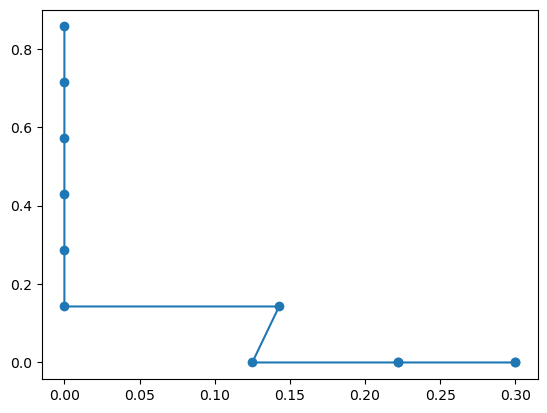

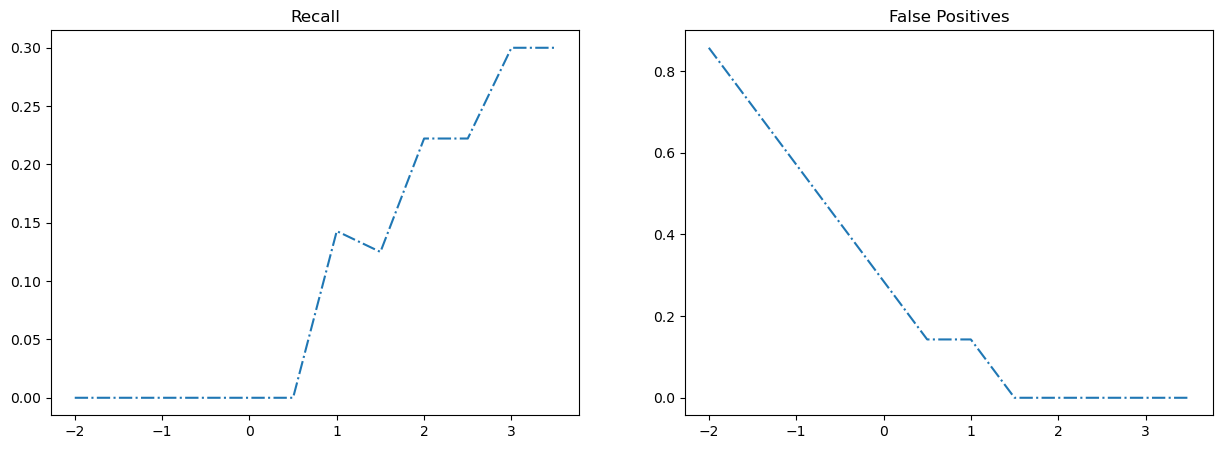

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

np.random.seed(0)

amostras = np.array([-2., -1.5, -1., -0.5, 0., 0.5, 1., 1.5, 2., 3.])
classes_verdadeiras = np.array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0])

print(amostras.shape)
print(classes_verdadeiras.shape)

limites = np.arange(-2., 4, 0.5)
false_positives = []
true_positives = []


for limite in limites: 
    print("Limite: ", limite)
    classes_estimadas = (amostras>limite)*1

    CM = confusion_matrix(classes_verdadeiras, classes_estimadas)

    print(CM)

    tp = CM[0][0] / (CM[0][0] + CM[1][0])
    fp = CM[1][1] / (CM[1][0] + CM[1][1])

    print("tp: ", tp)
    print("fp:", fp)
    print("")
    true_positives.append(tp)
    false_positives.append(fp)

print(len(false_positives))
print(len(true_positives))

plt.plot(false_positives, true_positives, '-o')


plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Recall")
plt.plot(limites, true_positives, '-.')

plt.subplot(122)
plt.title("False Positives")
plt.plot(limites, false_positives, '-.')

